In [14]:
# FORECASTING - FB PROPHET
# Prediciting base on previous data
# Forecasting vegetable price
# dataset - https://nhrdf.org/en-us/DailyWiseMarketArrivals

In [15]:
import pandas as pd
df = pd.read_html('/content/DailyWiseMarketArrivals.html')[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4178,16/Feb/2022,BANGALORE,5780,1500,1800,1650
4179,17/Feb/2022,BANGALORE,8000,1400,1600,1500
4180,18/Feb/2022,BANGALORE,7840,1600,1800,1700
4181,22/Feb/2022,BANGALORE,7180,1600,2000,1800


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4183 entries, 0 to 4182
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4182 non-null   object
 1   Market                4183 non-null   object
 2   Arrival(q)            4183 non-null   int64 
 3   Price Minimum (Rs/q)  4183 non-null   object
 4   Price Maximum (Rs/q)  4183 non-null   object
 5   Modal Price (Rs/q)    4183 non-null   object
dtypes: int64(1), object(5)
memory usage: 196.2+ KB


In [17]:
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [18]:
df = df.dropna()
df.isnull().sum()

Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4182 non-null   object
 1   Market                4182 non-null   object
 2   Arrival(q)            4182 non-null   int64 
 3   Price Minimum (Rs/q)  4182 non-null   object
 4   Price Maximum (Rs/q)  4182 non-null   object
 5   Modal Price (Rs/q)    4182 non-null   object
dtypes: int64(1), object(5)
memory usage: 228.7+ KB


In [20]:
# FB PROPHET - FACEBOOK
# FBPROPHET only considers 2 columns ans the column names should be ds and y
df = df.rename(columns = {'Modal Price (Rs/q)' : 'y', 'Date':'ds'}) 
df

,ds,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),y
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4177,15/Feb/2022,BANGALORE,9680,1500,1800,1650
4178,16/Feb/2022,BANGALORE,5780,1500,1800,1650
4179,17/Feb/2022,BANGALORE,8000,1400,1600,1500
4180,18/Feb/2022,BANGALORE,7840,1600,1800,1700


In [21]:
df_new = df[['ds','y']]
df_new

,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4177,15/Feb/2022,1650
4178,16/Feb/2022,1650
4179,17/Feb/2022,1500
4180,18/Feb/2022,1700


In [22]:
  df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4182 non-null   object
 1   y       4182 non-null   object
dtypes: object(2)
memory usage: 98.0+ KB


In [26]:
df_new['ds'] = pd.to_datetime(df_new['ds'])
df_new['y'] = df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4182 non-null   datetime64[ns]
 1   y       4182 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 98.0 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


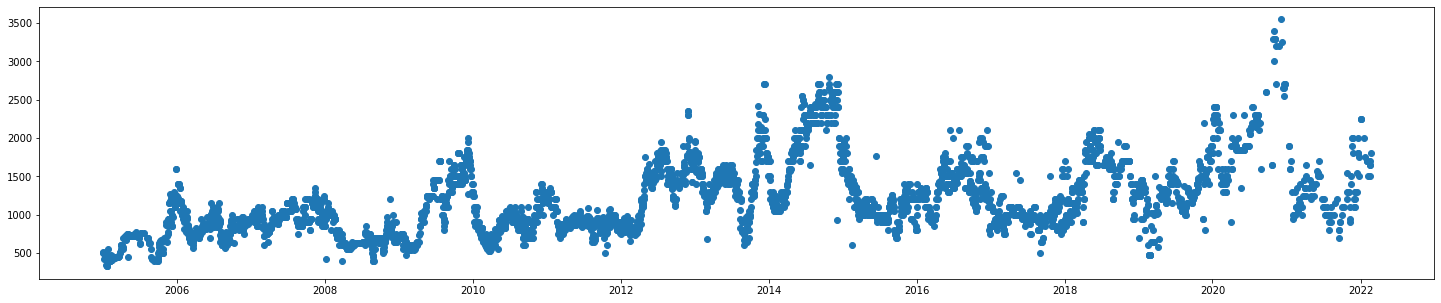

In [31]:
# visualisation 
import matplotlib.pyplot as plt
plt.figure(figsize= (25,5))
plt.scatter(df_new['ds'], df_new['y'])

In [32]:
# FB PROPHET
import fbprophet
op = fbprophet.Prophet()
op.fit(df_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
forecast = op.make_future_dataframe(periods = 365, freq = 'D')
forecast = op.predict(forecast)

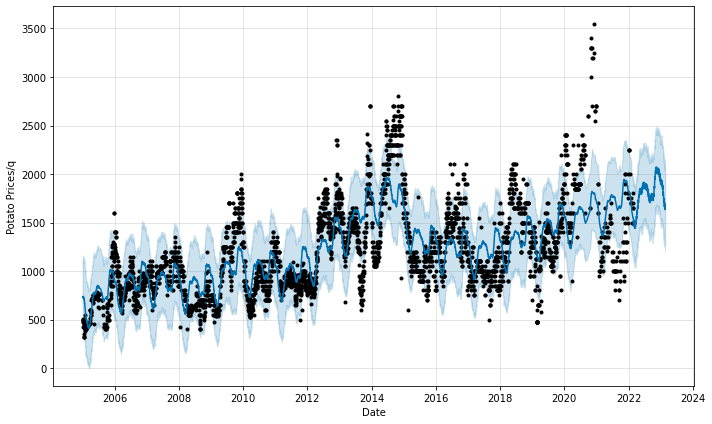

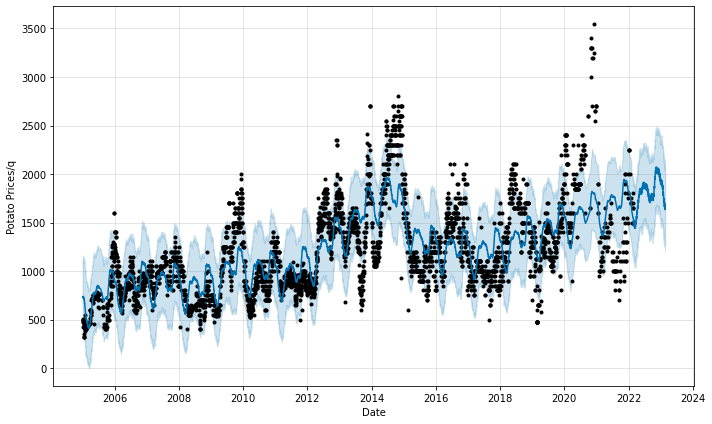

In [34]:
op.plot(forecast, xlabel = 'Date', ylabel = 'Potato Prices/q')

In [ ]:
# DIAL